In [5]:
# If using Google Colab, install missing packages
# (Uncomment if running in Colab)
# !pip install seaborn scikit-learn pandas matplotlib

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler


This block imports all essential libraries:

NumPy – numerical operations

Pandas – loading/cleaning tabular data

Seaborn/Matplotlib – visualization

LabelEncoder / MinMaxScaler – encoding & normalization tools

Colab users often don’t have seaborn/sklearn preinstalled, so install commands are provided.

In [6]:
# Load Titanic dataset directly from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We pull the Titanic dataset from a public GitHub source.
df.head() gives a peek at the first 5 rows — useful for understanding structure.



In [7]:
print(f"Shape of dataset: {df.shape}")

df.info()


Shape of dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Shape → number of rows × columns

info() → data types + missing values

This helps identify which columns need cleaning.

In [8]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Gives statistical summary (mean, std, quartiles) for numeric columns.
Helpful to detect outliers or impossible values.

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

df.isna().sum()


/tmp/ipython-input-3305014605.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3305014605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


We fix missing values by:

Age → median (good for skewed distributions)

Fare → median

Embarked → most common category

Cabin → replaced with "Unknown" because many values missing

In [10]:
label = LabelEncoder()

df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])
df['Cabin'] = label.fit_transform(df['Cabin'])
df['Ticket'] = label.fit_transform(df['Ticket'])


Categorical → numerical conversion
LabelEncoder assigns numbers like:

Male → 0

Female → 1

This is required because ML models don’t understand text.

In [11]:
scaler = MinMaxScaler()

df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df[['Age', 'Fare']].head()


,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


MinMaxScaler transforms values into the range [0, 1]
Useful when:

values are unevenly scaled

plotting normalized histograms

preparing for ML algorithms that rely on distances

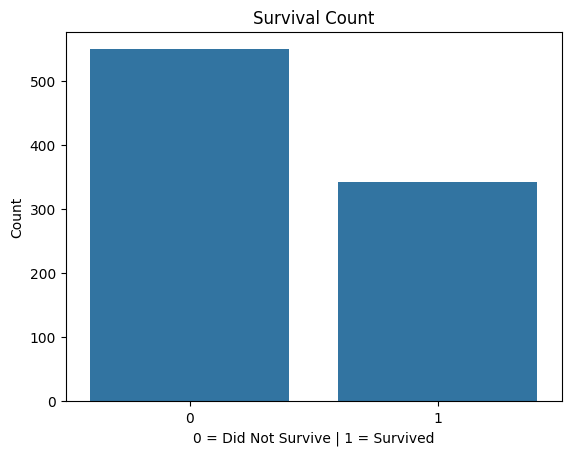

In [12]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("0 = Did Not Survive | 1 = Survived")
plt.ylabel("Count")
plt.show()


Shows how many people survived vs. did not.
Good for understanding class imbalance.

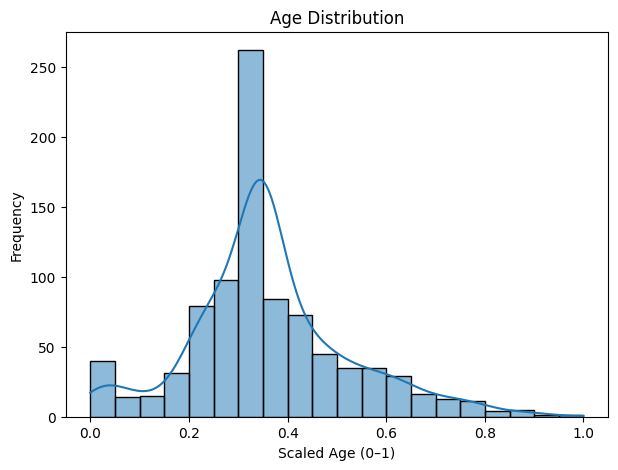

In [13]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Scaled Age (0–1)")
plt.ylabel("Frequency")
plt.show()


Histogram shows age distribution.
kde=True draws a smooth curve.

In [14]:
df.to_csv('titanic_cleaned.csv', index=False)


Exports the cleaned dataset for future lab assignments.